In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing=pd.read_csv('housing.csv')

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,id
count,20640.000000,20640.000000,19918.000000,20640.000000,20433.000000,20041.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.471242,35.036934,28.653630,2635.763081,537.870553,1425.418243,499.539680,3.870671,206855.816909,10319.500000
std,5.041408,94.903955,12.576796,2181.615252,421.385070,1135.185798,382.329753,1.899822,115395.615874,5958.399114
min,-124.350000,-13534.030000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,786.000000,280.000000,2.563400,119600.000000,5159.750000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1165.000000,409.000000,3.534800,179700.000000,10319.500000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1726.000000,605.000000,4.743250,264725.000000,15479.250000
max,122.030000,1327.130000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,20639.000000


In [6]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age    722
total_rooms             0
total_bedrooms        207
population            599
households              0
median_income           0
median_house_value      0
ocean_proximity         0
id                      0
dtype: int64

In [7]:
medians = housing[['housing_median_age', 'total_bedrooms', 'population']].median()
medians

housing_median_age      29.0
total_bedrooms         435.0
population            1165.0
dtype: float64

In [8]:
housing[['housing_median_age', 'total_bedrooms', 'population']] = housing[['housing_median_age', 'total_bedrooms', 'population']].fillna(medians)

In [9]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
id                    0
dtype: int64

In [11]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,id
longitude,1.000000,-0.010432,-0.042738,0.027778,0.036082,0.050877,0.031647,0.000711,-0.012281,-0.040027
latitude,-0.010432,1.000000,-0.008941,0.004204,0.004528,0.003989,0.004511,-0.015697,-0.017672,0.004463
housing_median_age,-0.042738,-0.008941,1.000000,-0.351839,-0.311638,-0.285721,-0.296206,-0.115577,0.104572,-0.179762
total_rooms,0.027778,0.004204,-0.351839,1.000000,0.927058,0.844284,0.918484,0.198050,0.134153,0.061896
total_bedrooms,0.036082,0.004528,-0.311638,0.927058,1.000000,0.861851,0.974366,-0.007617,0.049457,0.031782
population,0.050877,0.003989,-0.285721,0.844284,0.861851,1.000000,0.892793,0.004553,-0.024236,0.022994
households,0.031647,0.004511,-0.296206,0.918484,0.974366,0.892793,1.000000,0.013033,0.065843,0.030186
median_income,0.000711,-0.015697,-0.115577,0.198050,-0.007617,0.004553,0.013033,1.000000,0.688075,0.071673
median_house_value,-0.012281,-0.017672,0.104572,0.134153,0.049457,-0.024236,0.065843,0.688075,1.000000,0.072086
id,-0.040027,0.004463,-0.179762,0.061896,0.031782,0.022994,0.030186,0.071673,0.072086,1.000000


In [13]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


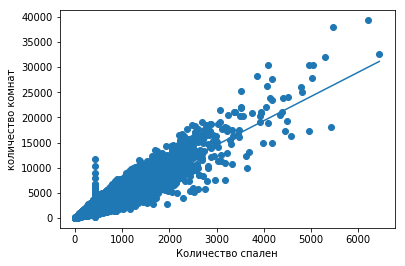

46.89997601810228 4.82242124168473


In [22]:
y = housing.total_rooms
x = housing.total_bedrooms

b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
a = np.mean(y) - b * np.mean(x)
y_pred = a + b * x

df = pd.DataFrame({'x': x, 'y': y, 'y_pred': y_pred}, columns=['x', 'y', 'y_pred'])
df = df.sort_values('x')
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])
plt.xlabel('Количество спален')
plt.ylabel('количество комнат')
plt.show()
print(a,b)